In [23]:
import DIC as dic
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def getGrayHistImage(hist):
    imgHist = np.full((100,256),255, dtype=np.uint8)

    histMax = np.max(hist)
    for x in range(256):
        pt1 = (x,100)
        pt2 = (x, 100 - int(hist[x,0]*100 /histMax))
        cv2.line(imgHist, pt1,pt2,0)

    return imgHist

def on_threshhold(pos):
    _, dst = cv2.threshold(src, pos, 255, cv2.THRESH_BINARY)
    cv2.imshow('dst', dst)

path = r'E:\experiment data\aluminum\2021-03-30\AL IMAGE\CTS_UVon_HSC'
num = 4

image = dic.load_file(path)
img = image[list(image.keys())[num]][:,:,1]

# img = np.where(img<75, 75, img)
# img = np.where(img>100, 100, img)
cur=img[331:447,214:309]
# cur = cv2.normalize(img,None, 0 ,255, cv2.NORM_MINMAX)
# cur = cv2.equalizeHist(img)
# alpha = 1.5
# cur = np.clip((1+alpha)*img - 128*alpha, 0, 255).astype(np.uint8)


src = cur.astype('uint8')
hist = cv2.calcHist([src],[0],None, [256],[0,256])
histImg = getGrayHistImage(hist)


cv2.imshow('src',src)
cv2.imshow('histImg', histImg)
# cv2.namedWindow('dst')
# cv2.createTrackbar('Treshold', 'dst', 0, 255, on_threshhold)
# cv2.setTrackbarPos('Treshold', 'dst', 125)

cv2.waitKey()
# cv2.imwrite(path+'/haaag%s.png'%list(image.keys())[num],src)
# cv2.imwrite(path+'/histogram%s.png'%list(image.keys())[num],histImg)
cv2.destroyAllWindows()


(array([[239.,   2.,   2.,   2.,   1.,   1.,   2.,   2.,   1.,   3.],
        [256.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.]]),
 array([   0. ,  119.7,  239.4,  359.1,  478.8,  598.5,  718.2,  837.9,
         957.6, 1077.3, 1197. ]),
 <a list of 2 BarContainer objects>)

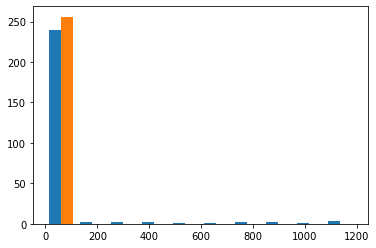

In [26]:
plt.hist(np.histogram(src, bins=255), )